Define a function that outputs the binomial coefficient

In [41]:
def binomial(n,k):
    # initialize result
    result = 1
    # multiply every number from n to n-k
    for i in range(n, n-k, -1):
        result = result * i
    # divide by k!
    for i in range(1,k+1):
        result = result/i
    # convert result to integer
    return int(result)

Create the first 20 rows of Pascal triangle using the function I just defined

In [42]:
for i in range(21):
    # print enough space on the left the make a triangle
    # starts off with no space and space increase
    for k in range(21-i):
        print(' ',end = '')
    # print out the binomail coefficient line by line
    for j in range(i):
        print(binomial(i,j), end = ' ')
    # add an extra 1 at the end
    print(1, end = '')
    print()

                     1
                    1 1
                   1 2 1
                  1 3 3 1
                 1 4 6 4 1
                1 5 10 10 5 1
               1 6 15 20 15 6 1
              1 7 21 35 35 21 7 1
             1 8 28 56 70 56 28 8 1
            1 9 36 84 126 126 84 36 9 1
           1 10 45 120 210 252 210 120 45 10 1
          1 11 55 165 330 462 462 330 165 55 11 1
         1 12 66 220 495 792 924 792 495 220 66 12 1
        1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
       1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
      1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
     1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
    1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
   1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
  1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
 

Define a function that outputs the probability of getting k heads from n flips of coin if the probability of getting head from one coin flip is p

In [43]:
def probability_k_times(n,k,p):
    return binomial(n,k)*(p**k)*((1-p)**(n-k))

Define a function that outputs the probability of getting $\bf{at\ least}$ k heads from n flips of coin if the probability of getting head from one coin flip is p

In [44]:
def probability_at_least_k_times(n,k,p):
    # initialize result
    result = 0
    i = k
    while i <= n:
        result = result + probability_k_times(n,i,p)
        i = i + 1
    return result

Baseball example.

In [45]:
n = 4
k = 1
p = 0.25
probability_at_least_k_times(n,k,p)

0.68359375

Simulate the experiment

In [57]:
import numpy as np

# initialize a list for plotting purpose
result_list = []

def experiment():
    # initialize boolean success
    success = False
    for j in range(4):
        # the player has 4 trials
        random_number = np.random.random()
        if random_number < 0.25:
            # ball is hit with a probability of 0.25
            success = True
    return success


number_of_repeat =  [10,100,1000,10000,100000]
for N in number_of_repeat:
    # initialize counter
    counter = 0
    for i in range(N): #repeat the experiment N times
        if experiment():
            counter = counter + 1
    percentage_of_success = counter/N
    print("When the experiment is repeated {} times, {} of them are successful.".format(N,percentage_of_success))
    result_list.append(percentage_of_success)
        

When the experiment is repeated 10 times, 0.8 of them are successful.
When the experiment is repeated 100 times, 0.65 of them are successful.
When the experiment is repeated 1000 times, 0.71 of them are successful.
When the experiment is repeated 10000 times, 0.6864 of them are successful.
When the experiment is repeated 100000 times, 0.67987 of them are successful.


Populating the interactive namespace from numpy and matplotlib


ValueError: p > 1

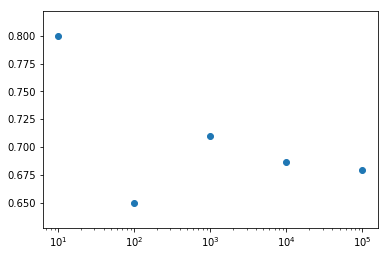

In [59]:
%pylab inline
import matplotlib.pyplot as plt
x = np.array(number_of_repeat)
y = np.array(result_list)
plt.scatter(x,y)
plt.xscale('log')
plt.axhline(y = probability_at_least_k_times(n,k,p))